# Importing necessary header files and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset
female_df = pd.read_csv('Indian-Female-Names.csv')
male_df = pd.read_csv('Indian-Male-Names.csv')

In [ ]:
male_df.head()

,name,gender,race
0,barjraj,m,indian
1,ramdin verma,m,indian
2,sharat chandran,m,indian
3,birender mandal,m,indian
4,amit,m,indian


In [ ]:
female_df.head()

,name,gender,race
0,shivani,f,indian
1,isha,f,indian
2,smt shyani devi,f,indian
3,divya,f,indian
4,mansi,f,indian


In [ ]:
# Encoding male to '1' and removing the race column
male_df.gender = male_df.gender.apply(lambda x: 1)
male_df.drop('race', 1, inplace=True)
male_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,name,gender
0,barjraj,1
1,ramdin verma,1
2,sharat chandran,1
3,birender mandal,1
4,amit,1


In [ ]:
# Encoding female to '0' and removing the race column
female_df.gender = female_df.gender.apply(lambda x: 0)
female_df.drop('race',1, inplace=True)
female_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,name,gender
0,shivani,0
1,isha,0
2,smt shyani devi,0
3,divya,0
4,mansi,0


In [ ]:
# Combining both the datasets
data_df = pd.concat([female_df, male_df])

In [ ]:
gender, count = np.unique(data_df['gender'], return_counts = True)
gender = ["Female", "Male"]

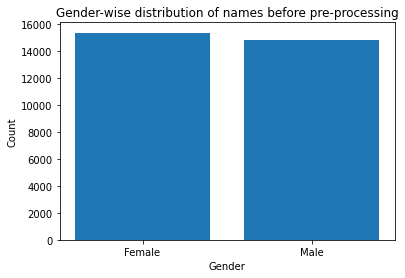

In [ ]:
plt.title("Gender-wise distribution of names before pre-processing")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.bar(gender, count)
plt.show()

# Data cleaning and pre-processing

In [ ]:
#dropping NAN and removing duplicates
data_df.dropna(inplace=True)
data_df.drop_duplicates(subset=['name'], keep='first', ignore_index=True, inplace=True)

In [ ]:
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df.head()

,name,gender
0,bacchu paswan,1
1,tafsir,1
2,suhail,1
3,sunita urf sonu,0
4,kuldeep kour,1


In [ ]:
#Chacter set
def get_character_set(df):
  character_set = sorted(list(set("".join(df.name.to_numpy()))))
  return character_set

In [ ]:
print(get_character_set(data_df))

['\t', ' ', '$', '&', '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '@', '[', '\\', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ì', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऐ', 'क', 'ख', 'ग', 'च', 'छ', 'ज', 'ट', 'ण', 'त', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', '़', 'ा', 'ि', 'ी', 'ु', 'ू', 'े', 'ै', 'ो', '्', '\u200d', '�']


In [ ]:
#defining a function to remove special character
def filter(name):
  name = name.lower()
  name = name.split()[0]
  cleaned_name = ""
  for ch in name:
    if ch in 'abcdefghijklmnopqrstuvwxyz':
      cleaned_name += ch
  return cleaned_name

In [ ]:
#applying function to whole dataset
data_df.name = data_df.name.apply(filter)

In [ ]:
valid_row_idx = [i for i, name in enumerate(data_df.name) if len(name) >= 4]
data_df = data_df.iloc[valid_row_idx,:]
data_df.head()

,name,gender
0,bacchu,1
1,tafsir,1
2,suhail,1
3,sunita,0
4,kuldeep,1


In [ ]:
gender, count = np.unique(data_df['gender'], return_counts = True)
gender = ["Female", "Male"]

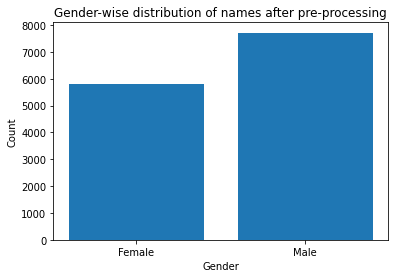

In [ ]:
plt.title("Gender-wise distribution of names after pre-processing")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.bar(gender, count)
plt.show()

In [ ]:
def isVowel(name):
  if name[-1] in 'aeiou':
    return 1
  else: return 0

In [ ]:
m_count = 0
f_count = 0
for i in range(len(data_df)):
  if(isVowel(str(data_df.iloc[i]['name']))):
    if(data_df.iloc[i]['gender'] == 0):
      f_count += 1
    else:
      m_count += 1

In [ ]:
f_count = (f_count / count[0])*100
m_count = (m_count / count[1])*100

In [ ]:
cnt = [f_count, m_count]

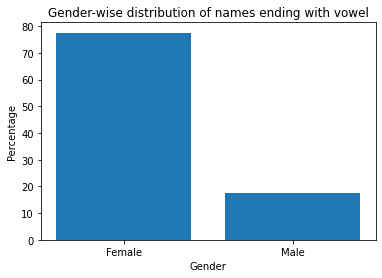

In [ ]:
plt.title("Gender-wise distribution of names ending with vowel")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.bar(gender, cnt)
plt.show()

# Feature engineering

In [ ]:
# Generating the feature set
feature_set = get_character_set(data_df) # All unique characters in the names
print(feature_set)
print(len(feature_set))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
26


In [ ]:
# Adding 2-gram suffix to the feature set
for ind in data_df.index:
  newString = data_df['name'][ind]
  ss= newString[-2:]
  feature_set.append(ss)
feature_set=set(feature_set)
feature_set= list(feature_set)
print(feature_set)
print(len(feature_set))


['iy', 'a', 't', 'es', 'cy', 'ka', 'gi', 'or', 'k', 'ob', 'za', 'it', 'py', 'nt', 'ca', 'bi', 'sy', 'ts', 'um', 'cu', 'ij', 'si', 'te', 'nk', 'ak', 'ap', 'ut', 'vr', 'da', 'nn', 'oj', 'in', 'z', 'w', 'x', 'up', 'aj', 'ke', 'om', 'd', 'rv', 'eh', 'rg', 'ab', 'ew', 've', 'rt', 'ng', 'mo', 'un', 'is', 'ub', 'hn', 'hy', 'su', 'af', 'qu', 'ki', 'am', 'em', 'oo', 'ur', 'bh', 'no', 'pe', 'e', 'mu', 'im', 'to', 'ma', 'ez', 'nm', 'zu', 'se', 'ih', 'ig', 'rs', 'dh', 'uu', 'be', 'va', 'er', 'ir', 'wi', 'md', 'ie', 'os', 'jl', 'dr', 'ok', 'ia', 'pa', 'ji', 'll', 'iv', 'bo', 'ch', 'de', 'st', 'ti', 'az', 'pu', 'ib', 'nu', 'ty', 'i', 'id', 'p', 'ha', 'ah', 'me', 'rn', 'fi', 'an', 'ny', 'ee', 'uk', 'kt', 'ej', 'fe', 'zi', 'us', 'ga', 'ss', 'ik', 'aa', 'xi', 'yu', 'il', 'di', 'ax', 'l', 'hd', 'ri', 'aw', 'aq', 'ne', 'mt', 'n', 'sm', 'rf', 'j', 'tn', 'hl', 'ic', 'v', 'wn', 'lo', 'rd', 'ag', 'bu', 'rm', 'uf', 'by', 'h', 'oh', 'g', 'ar', 'av', 'tu', 'ky', 'ol', 'ju', 'le', 'ro', 'jo', 'ya', 'rj', 'c', 's

In [ ]:
# Creating an index for every feature
feature_to_idx = {feature:i for i, feature in enumerate(feature_set)}
feature_to_idx

{'a': 1,
 'aa': 125,
 'ab': 43,
 'ad': 229,
 'af': 55,
 'ag': 149,
 'ah': 109,
 'ai': 181,
 'aj': 36,
 'ak': 24,
 'al': 255,
 'am': 58,
 'an': 113,
 'ap': 25,
 'aq': 135,
 'ar': 157,
 'as': 171,
 'at': 226,
 'av': 158,
 'aw': 134,
 'ax': 130,
 'ay': 257,
 'az': 100,
 'b': 241,
 'ba': 233,
 'be': 79,
 'bh': 62,
 'bi': 15,
 'bo': 95,
 'bu': 150,
 'by': 153,
 'c': 168,
 'ca': 14,
 'ce': 258,
 'ch': 96,
 'ck': 224,
 'cu': 19,
 'cy': 4,
 'd': 39,
 'da': 28,
 'db': 186,
 'de': 97,
 'dh': 77,
 'di': 129,
 'do': 187,
 'dr': 88,
 'du': 204,
 'dy': 217,
 'e': 65,
 'eb': 245,
 'ed': 200,
 'ee': 115,
 'ef': 265,
 'eg': 194,
 'eh': 41,
 'ej': 118,
 'ek': 211,
 'el': 222,
 'em': 59,
 'en': 223,
 'ep': 250,
 'er': 81,
 'es': 3,
 'et': 174,
 'ev': 263,
 'ew': 44,
 'ey': 178,
 'ez': 70,
 'f': 266,
 'fa': 185,
 'fe': 119,
 'fi': 112,
 'g': 156,
 'ga': 122,
 'ge': 208,
 'gh': 218,
 'gi': 6,
 'go': 227,
 'gu': 182,
 'h': 154,
 'ha': 108,
 'hd': 132,
 'he': 191,
 'hi': 230,
 'hl': 143,
 'hm': 214,
 'hn': 5

In [ ]:
size = len(data_df)

In [ ]:
data_df.head()

,name,gender
0,bacchu,1
1,tafsir,1
2,suhail,1
3,sunita,0
4,kuldeep,1


In [ ]:
features = np.zeros(269*size, dtype=int).reshape(size,269)
print(features.shape)

(13536, 269)


In [ ]:
# Converting each name to the vector form, which will be given as input the model
count = 0
for name in data_df.name:
    suffix = name[-2:]
    if suffix in feature_to_idx:
        features[count][feature_to_idx[suffix]] = 1
    features[count][-1] = isVowel(name)
    name = set(name)
    for ch in name:
        features[count][feature_to_idx[ch]] = 1
    count += 1

In [ ]:
print(data_df.iloc[0][0])
print(features[0])

bacchu
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1]


In [ ]:
label = data_df.gender.to_numpy()

# Model training and comparison

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape

(9475, 269)

In [ ]:
y_train[1]

1

In [ ]:
# Logictic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)

In [ ]:
pred_cl = clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

0.8364934745136666

In [ ]:
conf_mat_lr = confusion_matrix(y_test, pred_cl)

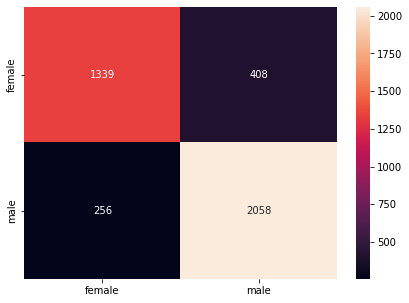

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
sns.heatmap(conf_mat_lr, annot=True, fmt="", yticklabels=['female', 'male'], xticklabels=['female', 'male'])
fig.show()

In [ ]:
f1_score(y_test, pred_cl)

0.8610878661087866

In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)
svm_acc = clf.score(X_test, y_test)
preds_svm = clf.predict(X_test)
print(f"Accuracy = {svm_acc*100} %")

Accuracy = 86.18566855454321 %


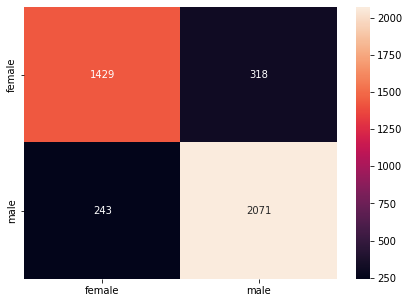

In [ ]:
conf_mat_svm = confusion_matrix(y_test, preds_svm)
fig = plt.figure(figsize=(7,5))
sns.heatmap(conf_mat_svm, annot=True, fmt="", yticklabels=['female', 'male'], xticklabels=['female', 'male'])
fig.show()

In [ ]:
f1_score(y_test, preds_svm)

0.8807144375930257

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(random_state=0)
dt_clf = dt_clf.fit(X_train, y_train)

dt_acc= dt_clf.score(X_test, y_test)

y_pred = dt_clf.predict(X_test)
print(f"Accuracy = {dt_acc*100} %")

Accuracy = 85.10219157842896 %


In [ ]:
f1_score(y_test, y_pred)

0.8694150658320743

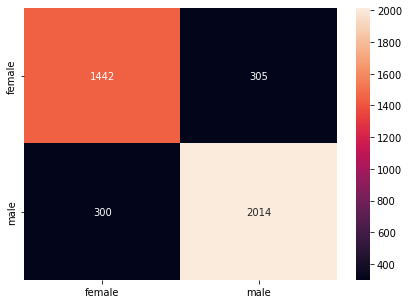

In [ ]:
conf_mat_dt = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(7,5))
sns.heatmap(conf_mat_dt, annot=True, fmt="", yticklabels=['female', 'male'], xticklabels=['female', 'male'])
fig.show()

In [ ]:
# Artificial Neural Network
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier((100)).fit(X_train, y_train)
nn_acc = nn_clf.score(X_test, y_test)
nn_preds = nn_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print(f"Accuracy = {nn_acc*100} %")

Accuracy = 86.80128047278995 %


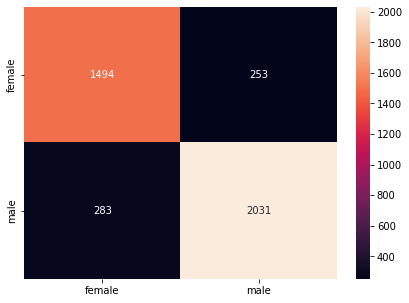

In [ ]:
conf_mat_nn = confusion_matrix(y_test, nn_preds)
fig = plt.figure(figsize=(7,5))
sns.heatmap(conf_mat_nn, annot=True, fmt="", yticklabels=['female', 'male'], xticklabels=['female', 'male'])
fig.show()

In [ ]:
f1_score(y_test, nn_preds)

0.8834275772074814

In [ ]:
def encode_name(name):
  encoding = np.zeros(269, dtype=int).reshape(1,-1)
  for ch in name:
    encoding[0][feature_to_idx[ch]] = 1
  suffix = name[-2:]
  suffix_idx = feature_to_idx.get(suffix, None)
  if suffix_idx:
    encoding[0][feature_to_idx[suffix]] = 1
  if isVowel(name):
    encoding[0][-1] = 1
  
  return encoding

In [ ]:
def predict_gender(name, model):
  name = filter(name)
  encoding = encode_name(name)
  predicted_gender = model.predict(encoding)
  if predicted_gender:
    return "male"
  else: return "female"

In [ ]:
name = "rishabh"
predict_gender(name, clf)

'male'